#### Aim- To analyze loan data and draw conclusions to reduce the number of defaulters

#### Key Steps:
##### 1) Data Sourcing
##### 2) Data Cleaning
##### 3) Univariate Analysis
##### 4) Bivariate Analysis
##### 5) Multivariate Analysis

## Data Sourcing

In [79]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
#To see all rows and col
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [81]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [82]:
#Checking the first 5 rows of the data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [83]:
#Checking the shape of the data
loan_data.shape

(39717, 111)

In [84]:
#Getting a summary of the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [85]:
#Checking mathematical and statistical information
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [86]:
#Checking the datatypes of all columns
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Data Cleaning

In [87]:
#Checking null value percentage in each columns
loan_data.isnull().mean()*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

#### It is observed that a lot of columns have null values more than 40%

In [88]:
#Dropping columns that have null values>=40%
loan_data=loan_data.loc[:,(loan_data.isnull().mean()*100 < 40)]

In [89]:
#Checking the shape
loan_data.shape

(39717, 54)

#### There are several columns with single value throughout. They can be dropped

In [90]:
loan_data=loan_data.loc[:,(loan_data.nunique()!=1)]

In [91]:
loan_data.shape

(39717, 45)

#### There are a lot of columns which wont be useful for the analysis. For eg. some correspond to the post approval of the loan. So, it is better to drom all of them

In [92]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)

In [93]:
loan_data.shape,

((39717, 22),)

In [94]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### It is enough if we have the values of fully paid or charged off loans to determine the defaulters. So, the current loans can be ignored

In [95]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [96]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [97]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0,Dec,2011
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0,Dec,2011
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0,Dec,2011
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0,Dec,2011
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0,Dec,2011


### Numerical and categorical columns

In [116]:
numerical_columns=['loan_amnt','funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']
categorical_columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'issue_month', 'issue_year']

In [117]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_month',
       'issue_year'],
      dtype='object')

### Missing values

In [118]:
#Checking missing value count in each column
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util                0
total_acc                 0
pub_rec_bankruptcies    658
issue_month               0
issue_year                0
dtype: int64

#### We can see that there are a few null values in 'emp_length', 'revol_util' and 'pub_rec_bankruptcies'

In [120]:
#Checking the values in the column 'emp_length'
loan_data.emp_length.value_counts()

emp_length
10.0    7887
0.0     4315
4.0     4205
2.0     4096
3.0     3820
5.0     3040
1.0     3037
6.0     2070
7.0     1641
8.0     1342
9.0     1153
Name: count, dtype: int64

#### Handling null values in 'emp_length'

In [121]:
#Creating a dictionary with all values of column 'emp_length' and changing the format of all values
dict={'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10}
loan_data.emp_length=loan_data.emp_length.replace(dict)

In [122]:
loan_data.emp_length.value_counts()

emp_length
10.0    7887
0.0     4315
4.0     4205
2.0     4096
3.0     3820
5.0     3040
1.0     3037
6.0     2070
7.0     1641
8.0     1342
9.0     1153
Name: count, dtype: int64

In [123]:
#Filling the null values with the median
loan_data.emp_length=loan_data.emp_length.fillna(loan_data.emp_length.median())

In [124]:
#Ensuring no null values
loan_data.emp_length.isnull().sum()

0

#### Handling null values in 'revol_util'

###### As 'revol_util' has just 50 null values, it is fine to drop all the rows which has null values

In [125]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

#### Handling null values in 'pub_rec_bankruptcies'

In [130]:
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.fillna(loan_data.pub_rec_bankruptcies.median())

In [131]:
loan_data.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
issue_month             0
issue_year              0
dtype: int64

#### So, there are no missing values in the data

### Standardizing data

In [132]:
#revol_util values
loan_data.revol_util=pd.to_numeric(loan_data.revol_util.apply(lambda x: str(x).split('%')[0]))

In [133]:
#int_rate values
loan_data.int_rate=pd.to_numeric(loan_data.int_rate.apply(lambda x: str(x).split('%')[0]))

In [134]:
#term values
loan_data.term=pd.to_numeric(loan_data.term.apply(lambda x: str(x).split('month')[0]))

### Outlier treatment

#### We check the column 'annual_inc' by plotting a box plot

<Axes: >

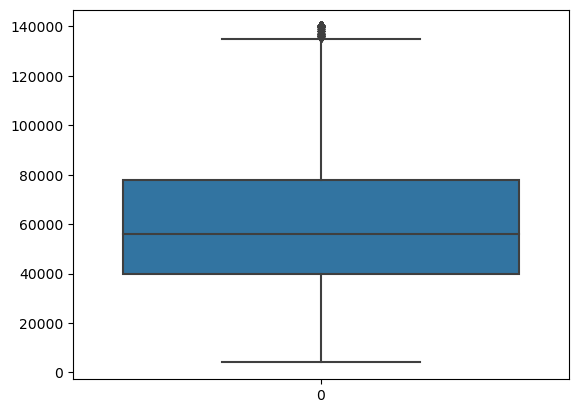

In [135]:
sns.boxplot(loan_data['annual_inc'])

#### We can check the quantile info to see which values to remove

In [136]:
loan_data.annual_inc.quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95])

0.00      4000.0
0.25     40000.0
0.50     56000.0
0.75     78000.0
0.90    100000.0
0.95    117000.0
Name: annual_inc, dtype: float64

#### We can observe that there are outliers beyond 95%. Those values should be removed

In [137]:
loan_data=loan_data[loan_data.annual_inc<=loan_data.annual_inc.quantile(0.95)]

In [138]:
loan_data.shape

(34784, 24)

<Axes: >

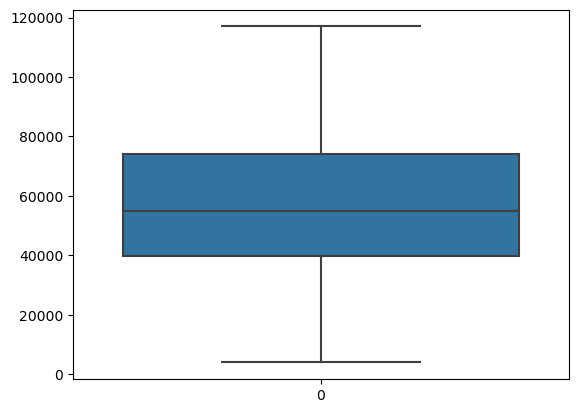

In [139]:
sns.boxplot(loan_data['annual_inc'])

## Univariate analysis

#### We have done the data cleaning process. Now, the data can be analyzed in various ways

### Categorical Univariate analysis

In [140]:
categorical_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'issue_month',
 'issue_year']

<Axes: xlabel='loan_status', ylabel='count'>

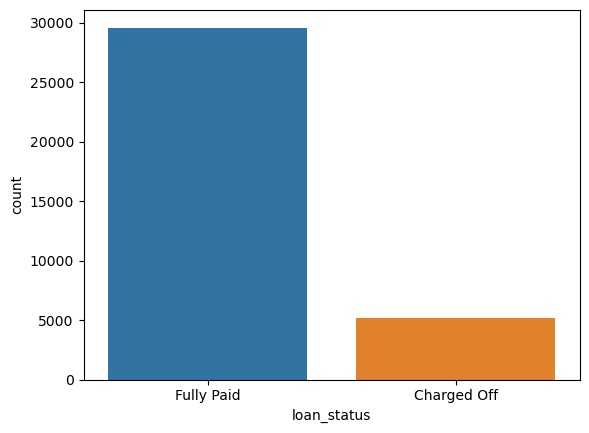

In [141]:
#Analyzing the 'loan_status' values
sns.countplot(data=loan_data, x='loan_status')

In [142]:
#Calculating percentage of charged off data
charged_off=loan_data.loan_status.value_counts()['Charged Off']/(loan_data.loan_status.value_counts()['Charged Off']+loan_data.loan_status.value_counts()['Fully Paid'])*100

#### It is observed that 14.78% of the customers are defaulters 

<Axes: xlabel='grade', ylabel='count'>

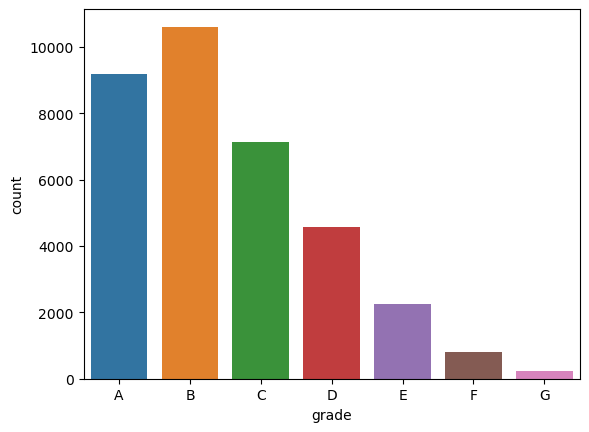

In [143]:
#Analyzing the 'grade' values 
sns.countplot(data=loan_data, x=loan_data.grade.sort_values(ascending=True))

#### It is observed that as grade increases, no of customers decreases. Most of the customers belong to the grade A, B and C (B is the maximum)

<Axes: xlabel='home_ownership', ylabel='count'>

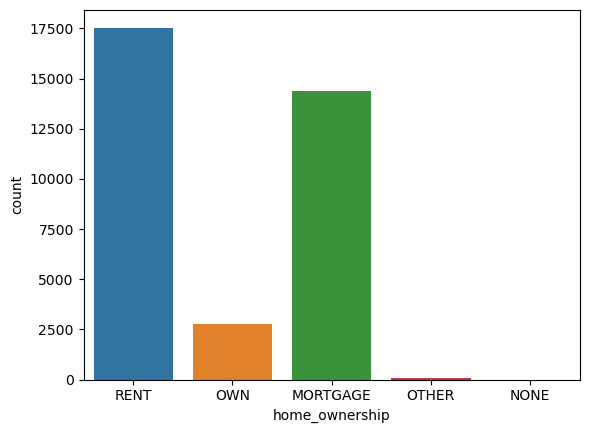

In [144]:
#Analyzing the 'home_ownership' values 
sns.countplot(data=loan_data, x='home_ownership')

#### Majority of the customers live in either a rented or a mortgaged house

<Axes: xlabel='issue_month', ylabel='count'>

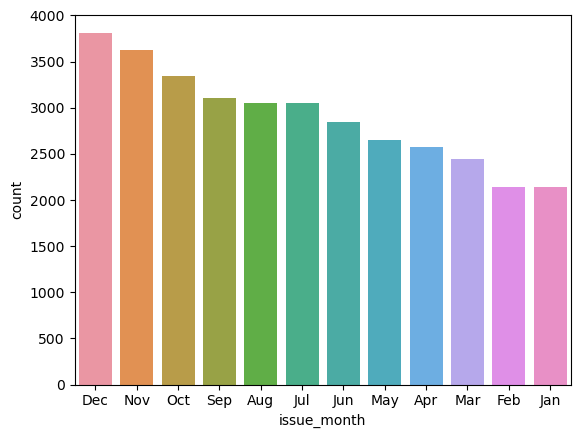

In [145]:
#Analyzing 'issue_month'
sns.countplot(data=loan_data,x='issue_month')

<Axes: xlabel='issue_year', ylabel='count'>

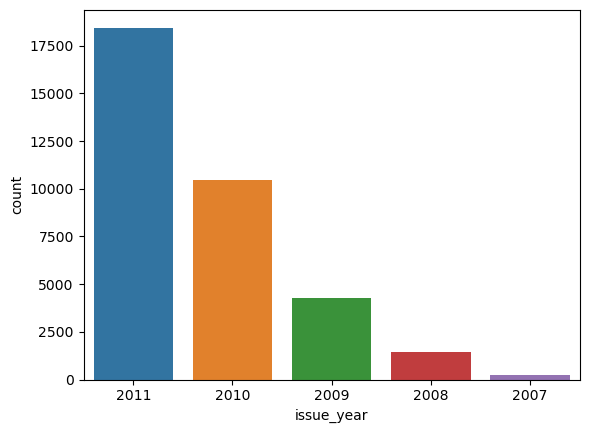

In [146]:
#Analyzing 'issue_year'
sns.countplot(x='issue_year', data=loan_data)

#### The above 2 plots show that there were more customers when the loan was issued in the year 2011 and especially in the month December

### Numerical Univariate analysis

In [147]:
numerical_columns

['loan_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

<Axes: xlabel='loan_amnt', ylabel='Count'>

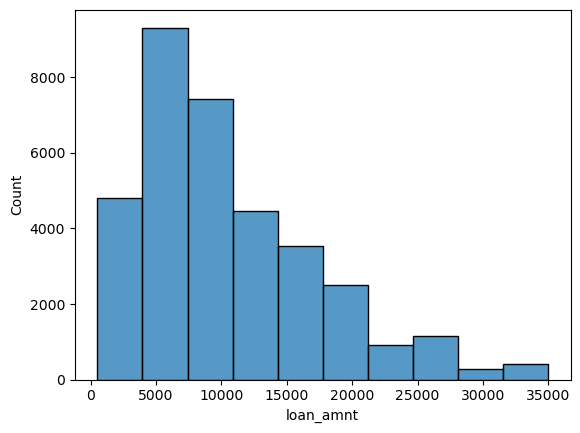

In [148]:
#Analyzing 'loan_amnt'
sns.histplot(data=loan_data, x='loan_amnt', bins=10)

#### Most of the customers applied for a loan amount between 5000 and 10000

<Axes: xlabel='term', ylabel='Count'>

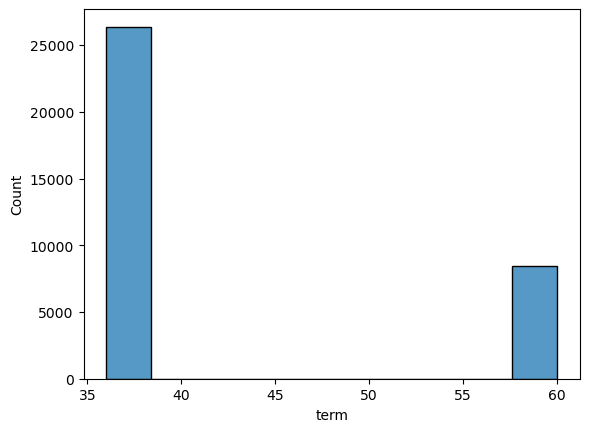

In [149]:
#Analyzing 'term'
sns.histplot(data=loan_data, x='term', bins=10)

#### This shows that most of the customers apply loan for a term of 36 months

<Axes: xlabel='int_rate', ylabel='Count'>

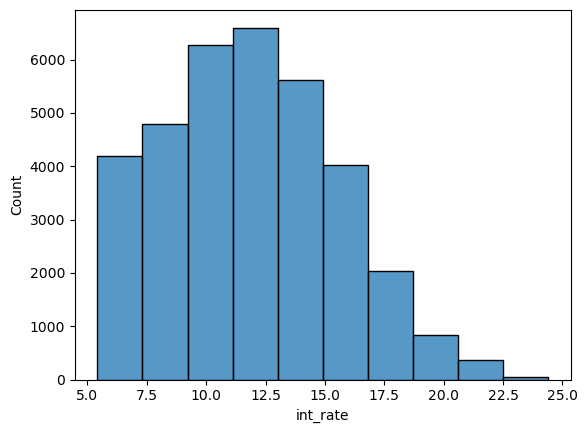

In [150]:
#Analyzing 'int_rate'
sns.histplot(data=loan_data, x='int_rate', bins=10)

#### There are more loans from 10% to 15% interest rates

<Axes: xlabel='emp_length', ylabel='Count'>

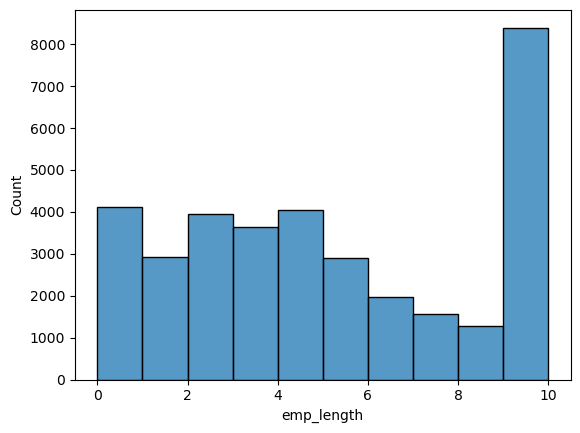

In [151]:
#Analyzing 'emp_length'
sns.histplot(data=loan_data, x='emp_length', bins=10)

#### Most of the customers have an experience of around 10 years

<Axes: xlabel='annual_inc', ylabel='Count'>

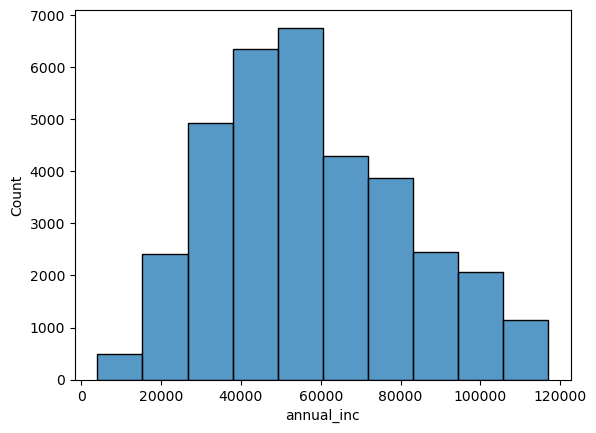

In [152]:
#Analyzing 'annual_inc'
sns.histplot(data=loan_data, x='annual_inc', bins=10)

#### Most of the customers have an annual income between 35000 to 60000 (approx)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

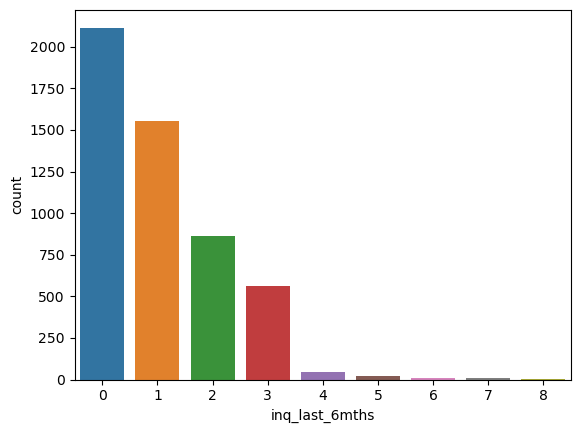

In [177]:
#Analyzing 'inq_last_6mths'
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### As the number of enquires in last 6 months are less, the count of defaulters are more

### Segmented Univariate Analysis

<Axes: xlabel='count', ylabel='purpose'>

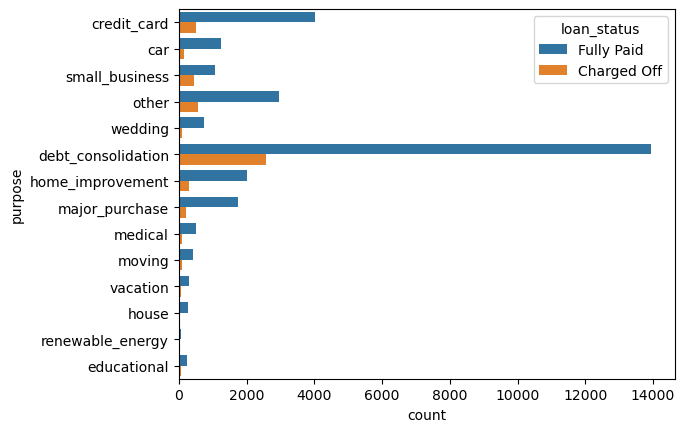

In [153]:
#loan_status based on purpose
sns.countplot(data=loan_data, y='purpose', hue='loan_status')

#### There are more loans in the category 'debt_consolation'. So, there can be more amount of fully paid and charged off customers

<Axes: xlabel='grade', ylabel='count'>

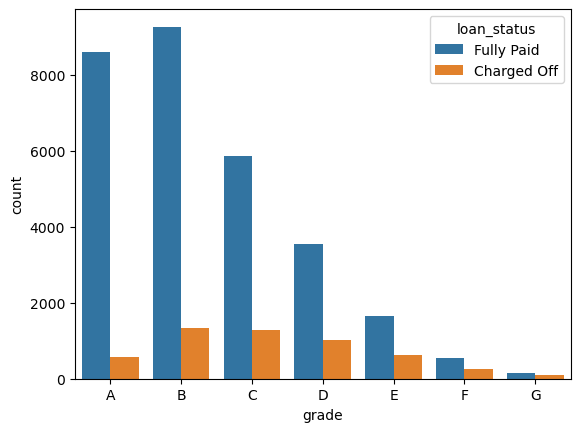

In [154]:
#loan_status based on grade
sns.countplot(data=loan_data.sort_values(by='grade',ascending=True), x='grade', hue='loan_status')

#### The count of fully paid and charged off customers decreases as grade increases. Most of the Grade A customers pay the loan fully and they are less likely to default. Meanwhile, B has more customers. Despite having the maximum count of fully paid customers, they have more defaulters.  

<Axes: xlabel='home_ownership', ylabel='count'>

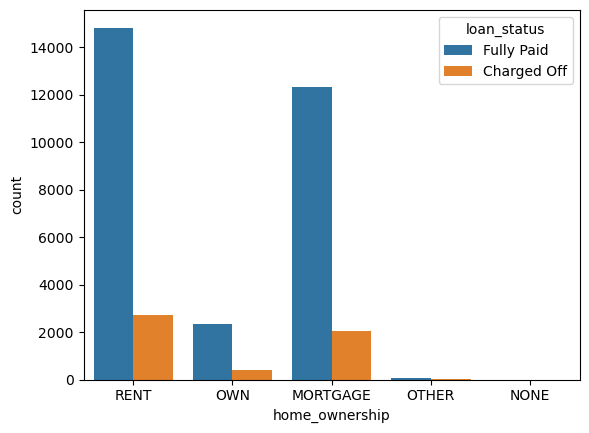

In [155]:
#Loan_status based on home_ownership
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')

#### The customers who have a rented and mortgaged house are more likely to default even if the count of fully paid is high when compared to own house customers

## Bivariate Analysis

<Axes: xlabel='grade', ylabel='int_rate'>

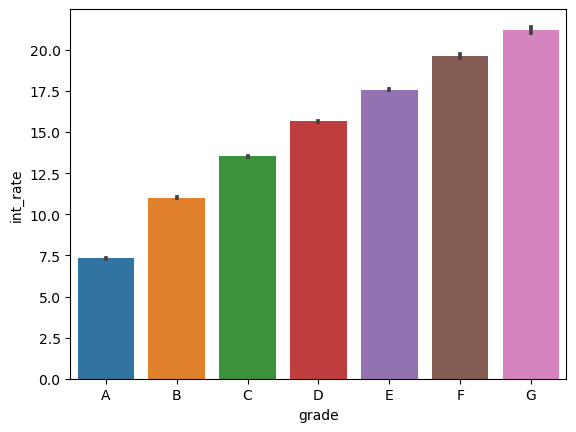

In [156]:
#grade vs interest_rate
sns.barplot(data=loan_data, x=loan_data.grade.sort_values(), y='int_rate')

#### We can observe that as grade increases, the interest rate increases

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

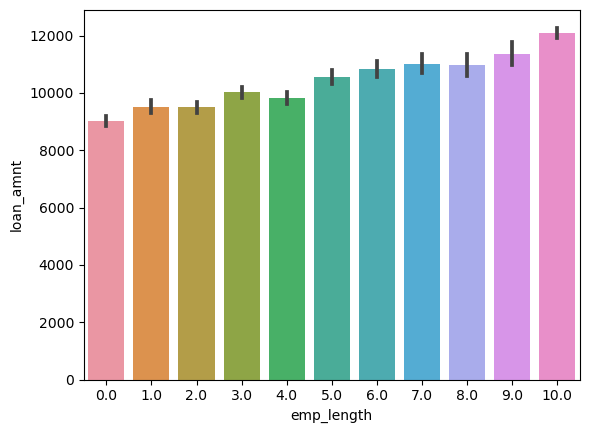

In [157]:
#loan_amnt vs emp_length
sns.barplot(data=loan_data, x=loan_data.emp_length, y='loan_amnt')

#### It is observed that as experience increases, the loan_amnt also increases. Aged customers are likely to get loans of higher amount

<Axes: xlabel='home_ownership', ylabel='int_rate'>

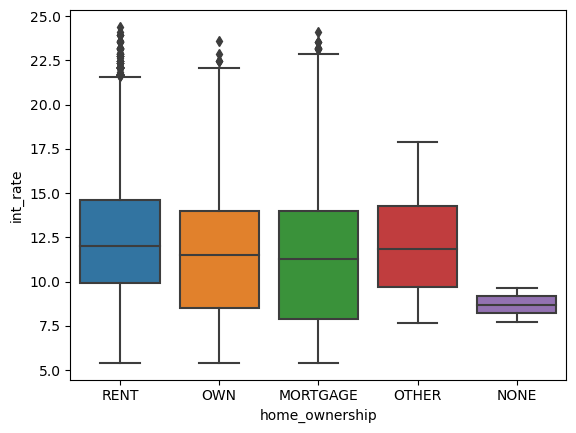

In [158]:
#home_ownership vs int_rate
sns.boxplot(data=loan_data, x=loan_data.home_ownership, y='int_rate')

#### Among all, the customers who have mortgaged house pay more interest and they have more chances to become a defaulter

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

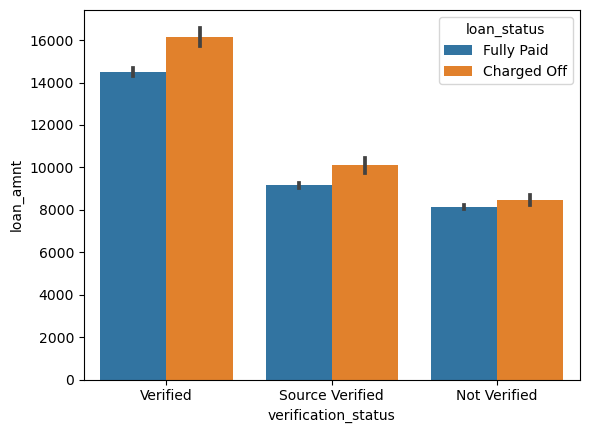

In [179]:
#verification_status vs loan_amnt
sns.barplot(data=loan_data, x=loan_data.verification_status, y='loan_amnt', hue='loan_status')

#### It can be seen that the loan amount is high for the 'verified' customers. Most of the customers pay the loan fully and there are sufficient defaulters too. It can be said that a customer is likely to be a defaulter if he/she is verified and the loan amount is more than 14000 

<Axes: xlabel='grade', ylabel='int_rate'>

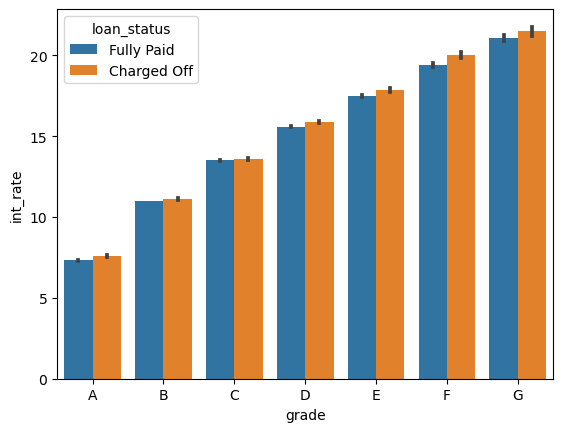

In [187]:
#grade vs int_rate
sns.barplot(data=loan_data, x=loan_data.grade.sort_values(), y='int_rate', hue='loan_status')

#### It was already seen that as grade increases, interest rate increases. Looking at the above plot, it can be inferred that defaulters are more likely to be in case of Grade G customers who pay interest > 20%

<Axes: xlabel='grade', ylabel='loan_amnt'>

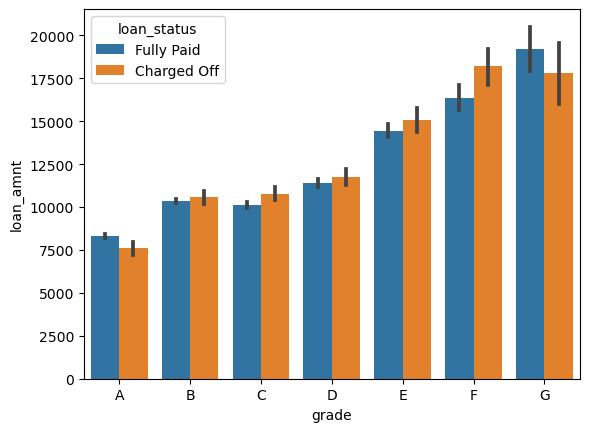

In [189]:
#grade vs loan_amnt
sns.barplot(data=loan_data, x=loan_data.grade.sort_values(), y='loan_amnt', hue='loan_status')

#### Grade F customers who pay loan amount between 15000 to 20000 are likely to be defaulters 

## Multivariate Analysis

#### We first plot a heat map to check the correlation

<Axes: >

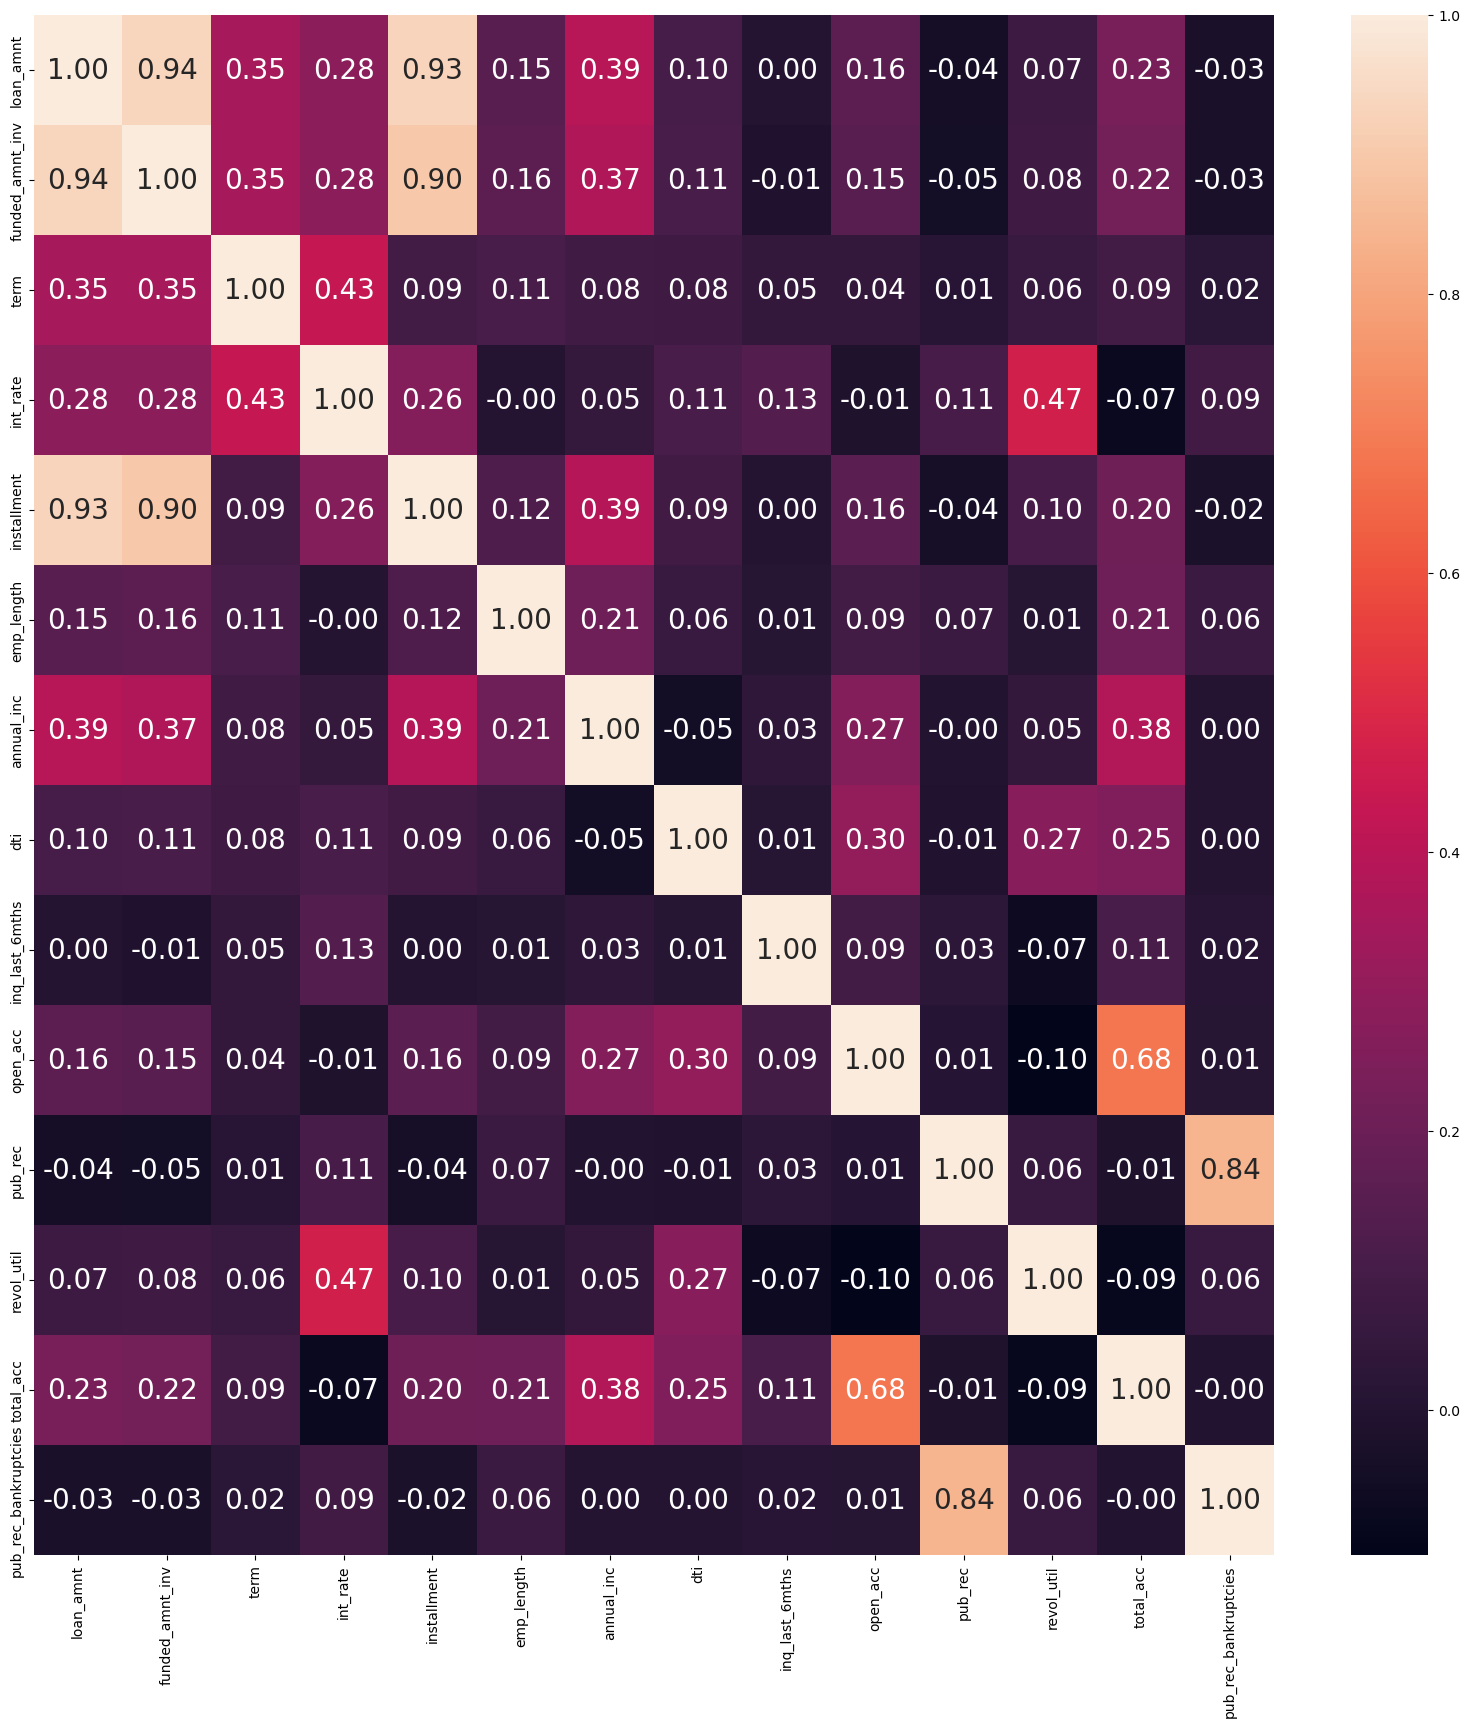

In [159]:
plt.figure(figsize=(20, 20))
sns.heatmap(loan_data[numerical_columns].corr(), annot=True, fmt='.2f', annot_kws={"size": 20})

##### We can observe the following patterns
##### Positive correlations:
##### 1) As annual income increases, the loan amount increases 
##### 2) As the term increases, the interest rate increases
##### 3) As revol_util increases, the interest rate increases
##### 4) As interest rate increases, pub_rec_bankruptcies increases
##### 5) As the emp_length increases, annual income increases

#### Analyzing with a pairplot

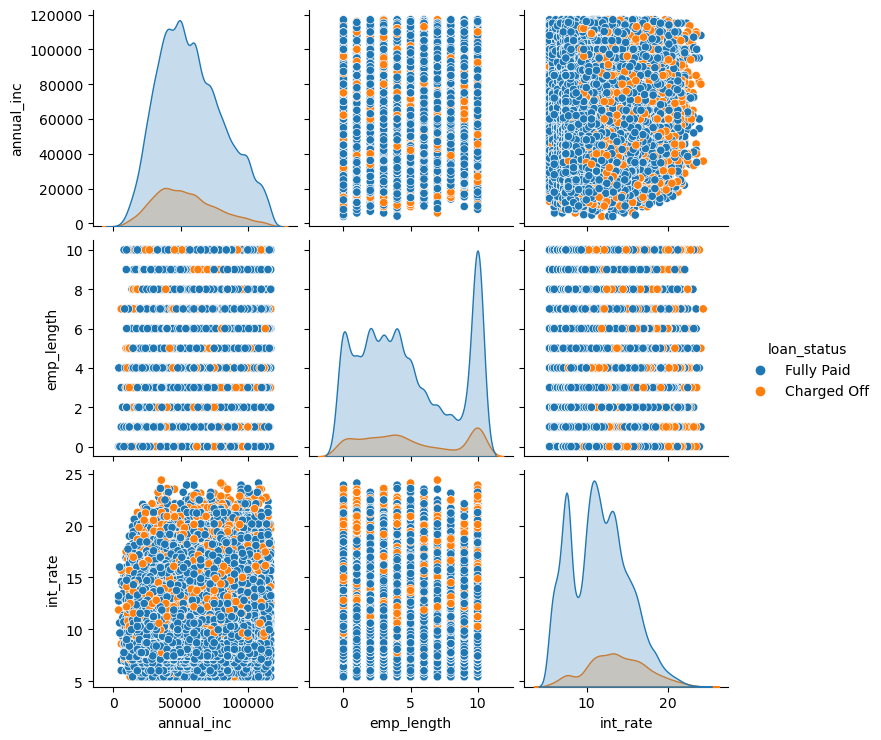

In [190]:
sns.pairplot(data=loan_data[['annual_inc','emp_length','int_rate','loan_status']],hue='loan_status')

## Inference

##### 1) There is a higher chance for defaulting in case of:
  ##### i) Grade G and interest rate > 20%
  ##### ii) Grade F and amount between 15k and 20k
##### 2) As the interest rate increases, the chance of defaulting also increases
##### 3) Customers with more emp_length (experience) would have a higher annual income and are more likely to pay the loan 
##### 4) Customers with public records and bankruptcies are more likely to default
##### 5) Customers having an own house are less likely to be defaulters. (More chance- Rented and Mortgaged customers)
##### 6) Verified customers with a loan amount more than Rs. 14000 have a higher chance of defaulting
##### 7) Customers getting a loan for ‘debt consolidation’ are more likely to default
##### 8) Probability of defaulting is high towards the end of the year (Maximum in December)
